In [17]:
#install.packages("rpart")
library(rpart)
library(rpart.plot)
library(tree)
set.seed(1)
#Leer el archivo, donde los datos vacios se rellenan de NA's
housingData = read.csv("housing_train.csv", header = TRUE,sep=",", na.strings="NA") #

# TRATAMIENTO DE MISSING
Si existen valores faltantes, decidir si eliminar los registros, llenarlos con valores como la media, la mediana o la moda y justifique su respuesta. 

## Eliminacion de variables con NAs >40%

**Hallamos los valores NA faltantes de cada una de las columnas del dataset**

In [18]:
#Porcentaje de valores numericos perdidos en la Data
DataNumeric<-Filter(is.numeric, housingData)
DataNumeric_NAs<-DataNumeric[,names(DataNumeric[is.na(colMeans(DataNumeric))])] > 0
apply(DataNumeric_NAs, 2, function(col)sum(is.na(col))/length(col)*100) #Porcentaje de valores perdidos por columna de la Data
#Porcentaje de valores categoricos perdidos en la Data
DataCategorical<-Filter(is.factor, housingData)
DataCategorical_Nas<-DataCategorical[,colnames(DataCategorical)[colSums(is.na(DataCategorical)) > 0]]
apply(DataCategorical_Nas, 2, function(col)sum(is.na(col))/length(col)*100) #Porcentaje de valores perdidos por columna de la Data

LotFrontage  MasVnrArea GarageYrBlt 
 17.7397260   0.5479452   5.5479452

Alley   MasVnrType     BsmtQual     BsmtCond BsmtExposure BsmtFinType1 
 93.76712329   0.54794521   2.53424658   2.53424658   2.60273973   2.53424658 
BsmtFinType2   Electrical  FireplaceQu   GarageType GarageFinish   GarageQual 
  2.60273973   0.06849315  47.26027397   5.54794521   5.54794521   5.54794521 
  GarageCond       PoolQC        Fence  MiscFeature 
  5.54794521  99.52054795  80.75342466  96.30136986

**Luego de haber filtrado que columnas tienen valores faltantes (NAs),eliminaremos columnas en base a los siguientes criterios**:

Por cuestiones practicas se eliminan los siguientes variables que superan el 15 % de datos faltantes.
- Alley:      :93.76% valores perdidos
- PoolQC      :99.52% valores perdidos
- Fence       :80.75% valores perdidos
- MiscFeature :96.30% valores perdidos
- FireplaceQu: 47.26% valores perdido
- LotFrontage: 17.73% valores perdidos

In [19]:
#Eliminamos las columnas que no tiene relevancia en el dataset dado el exceso de datos faltantes.
borrar <- c("Alley","PoolQC","Fence","MiscFeature","FireplaceQu","LotFrontage")
housingData <- housingData[ , !(names(housingData) %in% borrar)]
cat("Resultado de Porcentaje valores faltantes:",sum(is.na(housingData))/prod(dim(housingData))*100,"%")

Resultado de Porcentaje valores faltantes: 0.5561644 %

## Variables Numericas con NAs

Listamos las variables numericas que contienen NAs

In [20]:
#Porcentaje de valores numericos perdidos en la Data
DataNumeric<-Filter(is.numeric, housingData)
DataNumeric_NAs<-DataNumeric[,names(DataNumeric[is.na(colMeans(DataNumeric))])] > 0
apply(DataNumeric_NAs, 2, function(col)sum(is.na(col))/length(col)*100) #Porcentaje de valores perdidos por columna de la Data

MasVnrArea GarageYrBlt 
  0.5479452   5.5479452

Graficamos la distribucion y la correlacion que existen con SalePrice

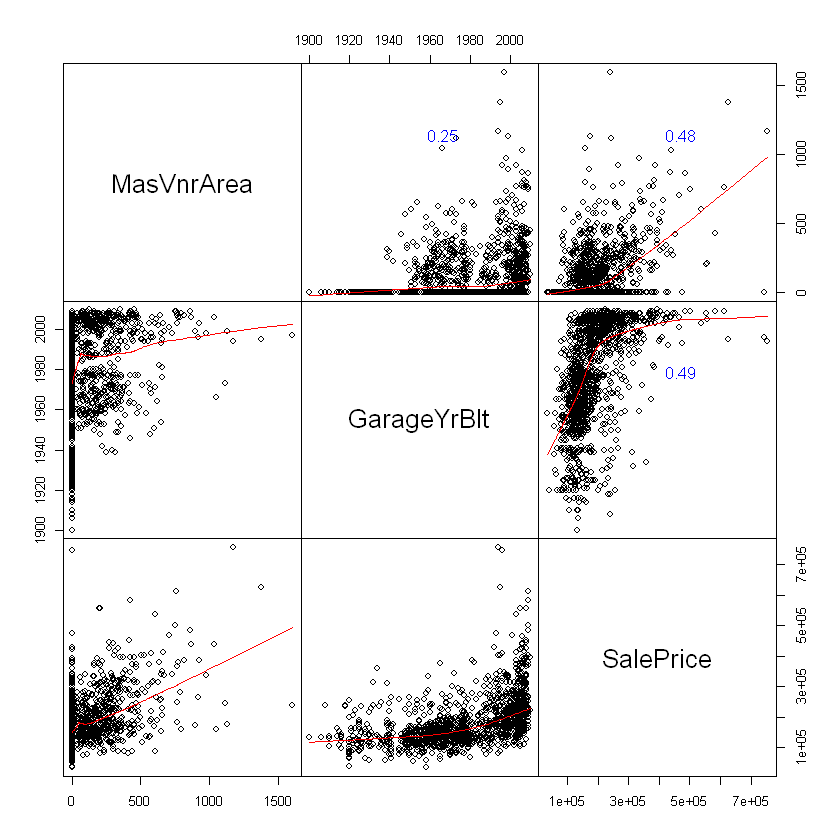

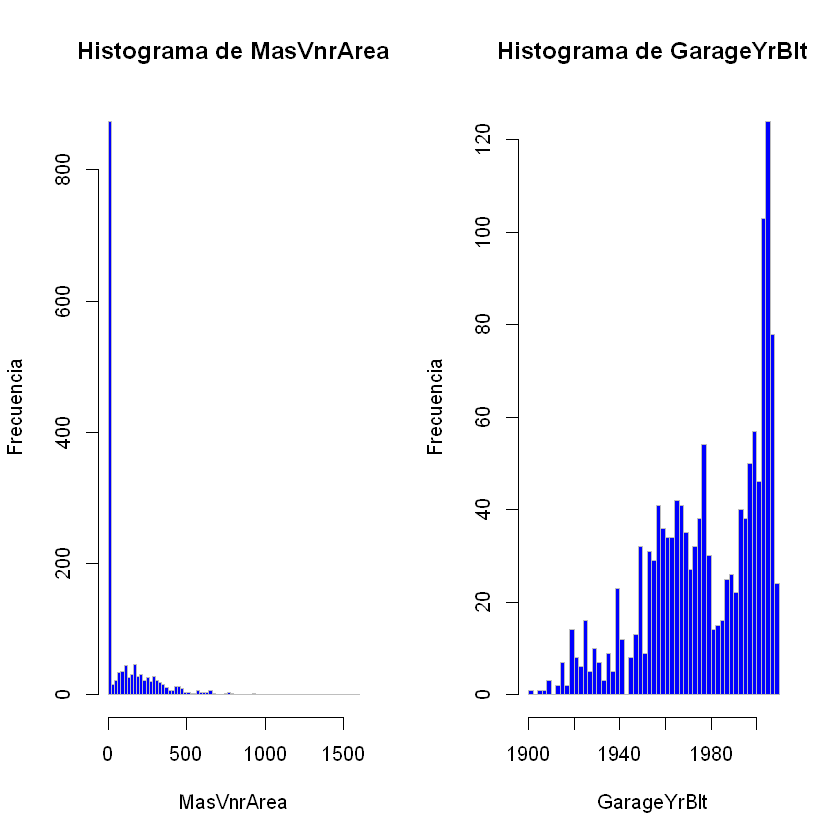

In [21]:
#Graficamos los histogramas de las variables numericas para evaluar su distribucion
#Hallamos la correlacion que existe de las variables independientes con respecto a la variable dependiente "SalePrice"
par(mfrow=c(1,2))

v<-c(which(colnames(DataNumeric)=="MasVnrArea"),which(colnames(DataNumeric)=="GarageYrBlt"),which(colnames(DataNumeric)=="SalePrice"))
a<-DataNumeric[,v]

pairs(a, gap=0, lower.panel = panel.smooth, upper.panel = function(x,y){
        panel.smooth(x,y)
        par(usr=c(0,1,0,1))
        correlacion <- cor(x,y, use="complete.obs")
        text(.6,.7, col="blue", cex=1.2, round(correlacion,digits=2))
}
)

hist(x = DataNumeric$MasVnrArea, main = "Histograma de MasVnrArea", xlab = "MasVnrArea", ylab = "Frecuencia",3,border="gray",col = "blue",breaks=c(70))
#plot(DataNumeric$MasVnrArea,DataNumeric$SalePrice  ,type = 'h', col= 'red', xlab = 'MasVnrArea', ylab = 'SalePrice')

hist(x = DataNumeric$GarageYrBlt, main = "Histograma de GarageYrBlt", xlab = "GarageYrBlt", ylab = "Frecuencia",3,border="gray",col = "blue",breaks=c(70))
#plot(DataNumeric$GarageYrBlt,DataNumeric$SalePrice  ,type = 'h', col= 'red', xlab = 'GarageYrBlt', ylab = 'SalePrice')


### Reemplazo por la media y eliminacion de variable asimetrica

**Segun la distribucion observado en los histogramas de variables numericas , se analiza lo siguiente:**

- GarageYrBlt : Cuenta con  NAs y cuenta con una distribucion asimetrica por lo tanto, ademas existe una fuerte correlacion con SalePrice, por lo que las NAs sera reemplazados por la Mediana
- MasVnrArea: Cuenta con NAs, cuenta con una distribucion asimetrica, asimismo no esta fuertemente relacionado con SalePrice, por lo que lo descartamos para el modelado.

In [22]:
#Reemplazamos la media y mediana para la variable GarageYrBlt
DataNumeric$GarageYrBlt <- ifelse(is.na(DataNumeric$GarageYrBlt), 
                                        median(DataNumeric$GarageYrBlt, na.rm =TRUE),
                                        DataNumeric$GarageYrBlt)

In [23]:
#Eliminamos la columna MasVnrArea
DataNumeric <-DataNumeric[,-which(colnames(DataNumeric)=="MasVnrArea")]

## Variables Categoricas con NAs

Listamos las variables categoricas que contienen NAs

In [24]:
#Porcentaje de valores categoricos perdidos en la Data
DataCategorical<-Filter(is.factor, housingData)
DataCategorical_Nas<-DataCategorical[,colnames(DataCategorical)[colSums(is.na(DataCategorical)) > 0]]
apply(DataCategorical_Nas, 2, function(col)sum(is.na(col))/length(col)*100) #Porcentaje de valores perdidos por columna de la Data

MasVnrType     BsmtQual     BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 
  0.54794521   2.53424658   2.53424658   2.60273973   2.53424658   2.60273973 
  Electrical   GarageType GarageFinish   GarageQual   GarageCond 
  0.06849315   5.54794521   5.54794521   5.54794521   5.54794521

### Omision de variables categoricas y Reemplazo por la Moda

In [25]:
#Convertimos las variables categoricas a numericas
DataCategorical[sapply(DataCategorical, is.factor)] <- data.matrix(DataCategorical[sapply(DataCategorical, is.factor)])

**Dado que la cantidad de NAs para las variables categoricas ronda un porcentaje pequeño de 3%, los ignoraremos ya que no 
son significantes para el gran tamaño del dataset, no obstante conservaremos las variables**

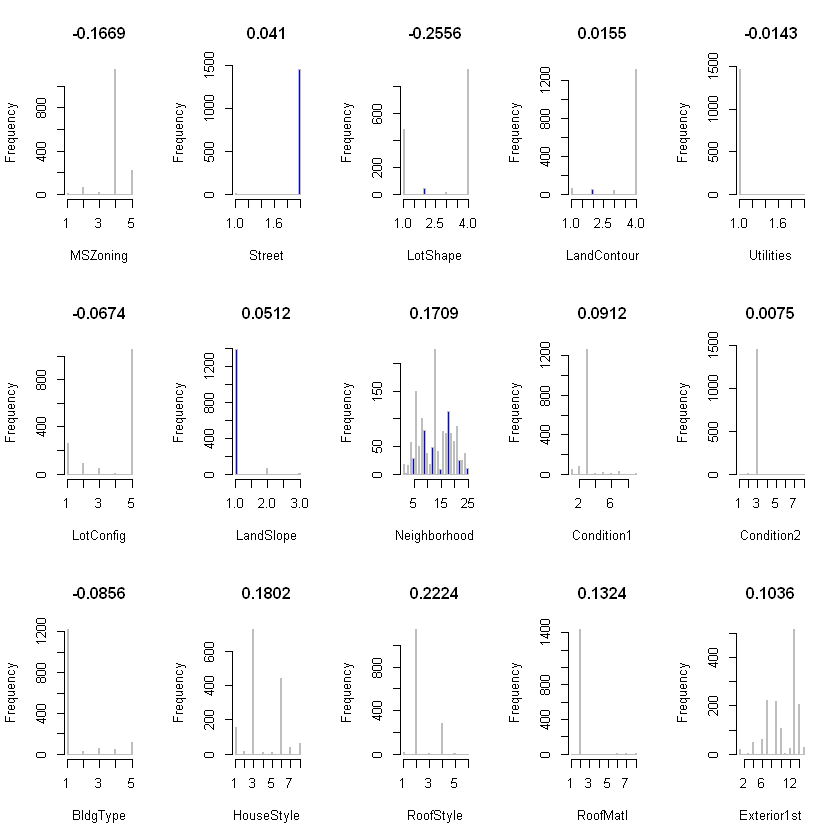

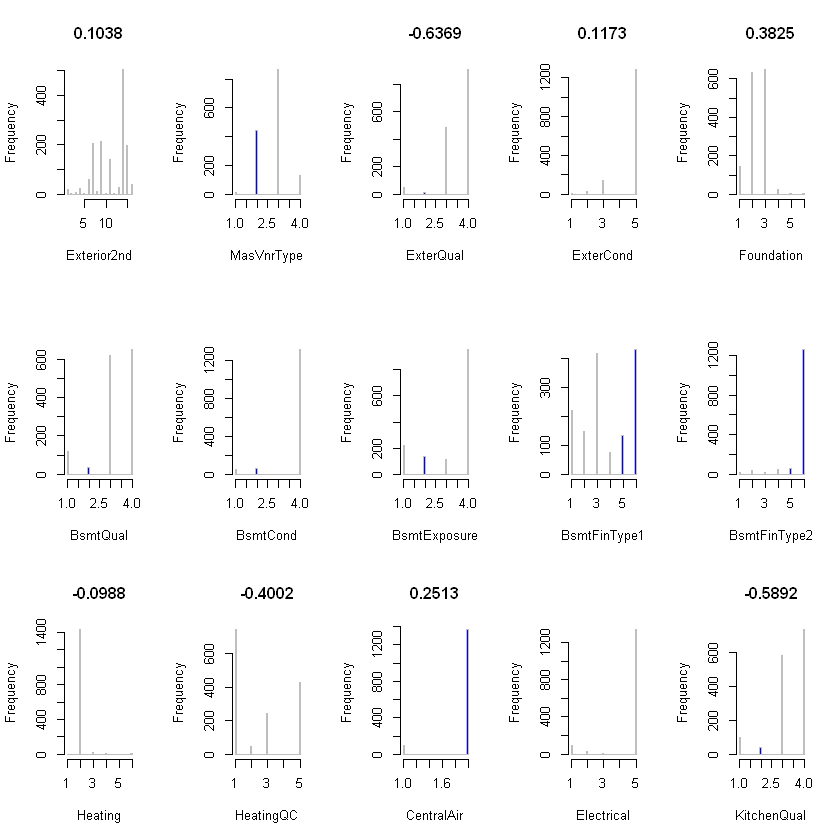

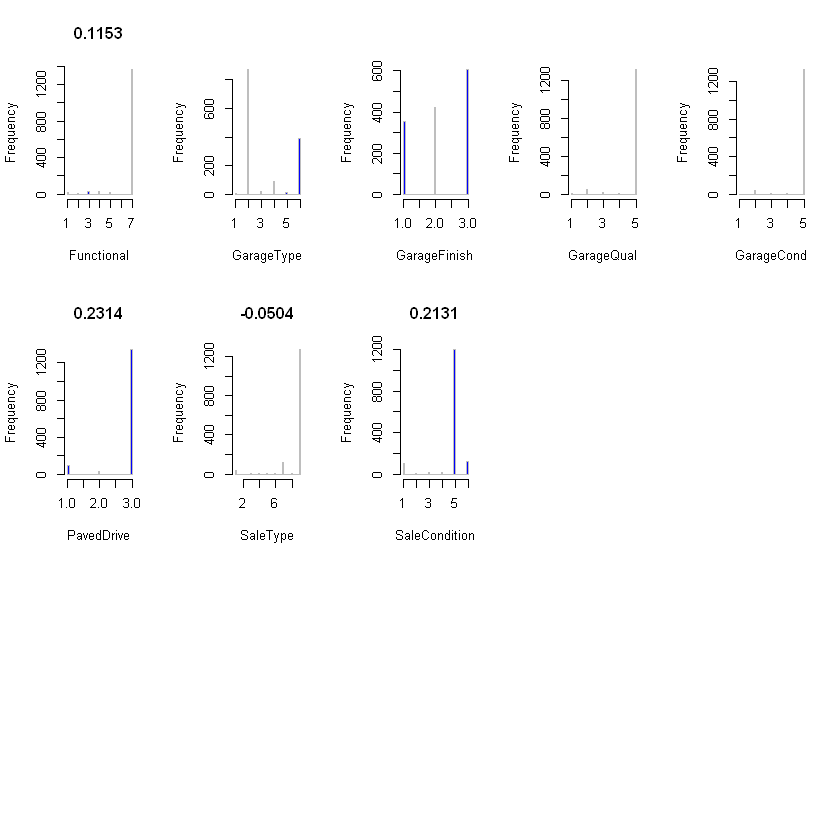

In [26]:
par(mfrow=c(3,5))  
for (i in 1:length(DataCategorical)){
    corx3<-cor(x=DataCategorical[,i],y=DataNumeric$SalePrice)
    a3<-round(corx3, digits=4)
    hist(DataCategorical[,i],xlab=colnames(DataCategorical[i]),main=a3,3,border="gray",col = "blue",breaks=c(70))
} 


De los graficos que se pueden visualizar, se observa que dichos datos categoricos no mantienen una fuerte relacion con el SalePrice, asimismo poseen bastantes valores atipicos cuya dispersion de las mismas se visualizan en la grafica. Por lo tanto se procede a eliminar del dataset las siguientes variables:

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Condition1
Condition2
RoofMatl
MasVnrType
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
GarageType
GarageQual
GarageCond

In [27]:
DataCategorical <-DataCategorical[,-which(colnames(DataCategorical)=="MSZoning")]
DataCategorical <-DataCategorical[,-which(colnames(DataCategorical)=="Street")]
DataCategorical <-DataCategorical[,-which(colnames(DataCategorical)=="LotShape")]
DataCategorical <-DataCategorical[,-which(colnames(DataCategorical)=="LandContour")]
DataCategorical <-DataCategorical[,-which(colnames(DataCategorical)=="Utilities")]
DataCategorical <-DataCategorical[,-which(colnames(DataCategorical)=="LotConfig")]
DataCategorical <-DataCategorical[,-which(colnames(DataCategorical)=="LandSlope")]
DataCategorical <-DataCategorical[,-which(colnames(DataCategorical)=="Condition1")]
DataCategorical <-DataCategorical[,-which(colnames(DataCategorical)=="Condition2")]
DataCategorical <-DataCategorical[,-which(colnames(DataCategorical)=="RoofMatl")]
DataCategorical <-DataCategorical[,-which(colnames(DataCategorical)=="MasVnrType")]
DataCategorical <-DataCategorical[,-which(colnames(DataCategorical)=="BsmtQual")]
DataCategorical <-DataCategorical[,-which(colnames(DataCategorical)=="BsmtCond")]
DataCategorical <-DataCategorical[,-which(colnames(DataCategorical)=="BsmtExposure")]
DataCategorical <-DataCategorical[,-which(colnames(DataCategorical)=="BsmtFinType1")]
DataCategorical <-DataCategorical[,-which(colnames(DataCategorical)=="BsmtFinType2")]
DataCategorical <-DataCategorical[,-which(colnames(DataCategorical)=="Electrical")]
DataCategorical <-DataCategorical[,-which(colnames(DataCategorical)=="GarageType")]
DataCategorical <-DataCategorical[,-which(colnames(DataCategorical)=="GarageQual")]
DataCategorical <-DataCategorical[,-which(colnames(DataCategorical)=="GarageCond")]

In [29]:
#Porcentaje de valores numericos perdidos en la Data
DataCategorical<-Filter(is.numeric, DataCategorical)
DataCategorical_NAs<-DataCategorical[,names(DataCategorical[is.na(colMeans(DataCategorical))])] > 0

apply(DataCategorical, 2, function(col)sum(is.na(col))/length(col)*100) #Porcentaje de valores perdidos por columna de la Data

Neighborhood      BldgType    HouseStyle     RoofStyle   Exterior1st 
     0.000000      0.000000      0.000000      0.000000      0.000000 
  Exterior2nd     ExterQual     ExterCond    Foundation       Heating 
     0.000000      0.000000      0.000000      0.000000      0.000000 
    HeatingQC    CentralAir   KitchenQual    Functional  GarageFinish 
     0.000000      0.000000      0.000000      0.000000      5.547945 
   PavedDrive      SaleType SaleCondition 
     0.000000      0.000000      0.000000

**Reemplazamos la variable GarageFinish por la moda, ya que mantiene fuertemente una relacion con SalePrice**

In [39]:
#install.packages("modeest")
library(modeest)
DataCategorical$GarageFinish<-mlv(DataCategorical$GarageFinish, method = "parzen", kernel = "gaussian")

# ANALISIS DESCRIPTIVO Y TRATAMIENTO DE VARIABLES

**De las variables numéricas(limpias) hallamos el valor mínimo, el máximo, la mediana y la media**

In [40]:
#Filtramos los datos numericos para halar el minimo,maximo, media y mediana
summary(DataNumeric)

       Id           MSSubClass       LotArea        OverallQual    
 Min.   :   1.0   Min.   : 20.0   Min.   :  1300   Min.   : 1.000  
 1st Qu.: 365.8   1st Qu.: 20.0   1st Qu.:  7554   1st Qu.: 5.000  
 Median : 730.5   Median : 50.0   Median :  9478   Median : 6.000  
 Mean   : 730.5   Mean   : 56.9   Mean   : 10517   Mean   : 6.099  
 3rd Qu.:1095.2   3rd Qu.: 70.0   3rd Qu.: 11602   3rd Qu.: 7.000  
 Max.   :1460.0   Max.   :190.0   Max.   :215245   Max.   :10.000  
  OverallCond      YearBuilt     YearRemodAdd    BsmtFinSF1    
 Min.   :1.000   Min.   :1872   Min.   :1950   Min.   :   0.0  
 1st Qu.:5.000   1st Qu.:1954   1st Qu.:1967   1st Qu.:   0.0  
 Median :5.000   Median :1973   Median :1994   Median : 383.5  
 Mean   :5.575   Mean   :1971   Mean   :1985   Mean   : 443.6  
 3rd Qu.:6.000   3rd Qu.:2000   3rd Qu.:2004   3rd Qu.: 712.2  
 Max.   :9.000   Max.   :2010   Max.   :2010   Max.   :5644.0  
   BsmtFinSF2        BsmtUnfSF       TotalBsmtSF       X1stFlrSF   
 Min.   

## Tratamiento Variables Numericas

### Matriz de Correlacion - Variables Numericas

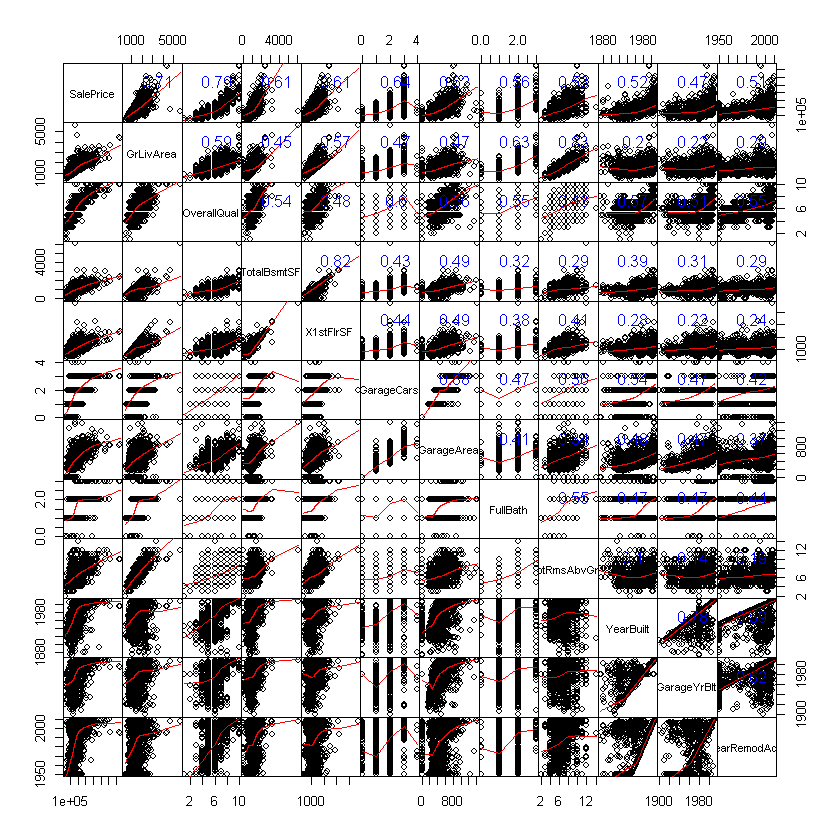

In [43]:
#Cargamos libreria
#install.packages("caret")
library(caret)
#Hallamos la matriz de correlacion
correlationMatrix <- cor(DataNumeric[,])
#Filtramos las columnas que tenga una relacion superior a 0.1
highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=0.10)
Data_Cor<-Filter(is.numeric, DataNumeric[highlyCorrelated])

pairs(Data_Cor[1:12], gap=0, lower.panel = panel.smooth, upper.panel = function(x,y){
        panel.smooth(x,y)
        par(usr=c(0,1,0,1))
        correlacion <- cor(x,y, use="complete.obs")
        text(.6,.7, col="blue", cex=1.2, round(correlacion,digits=2))
}
)

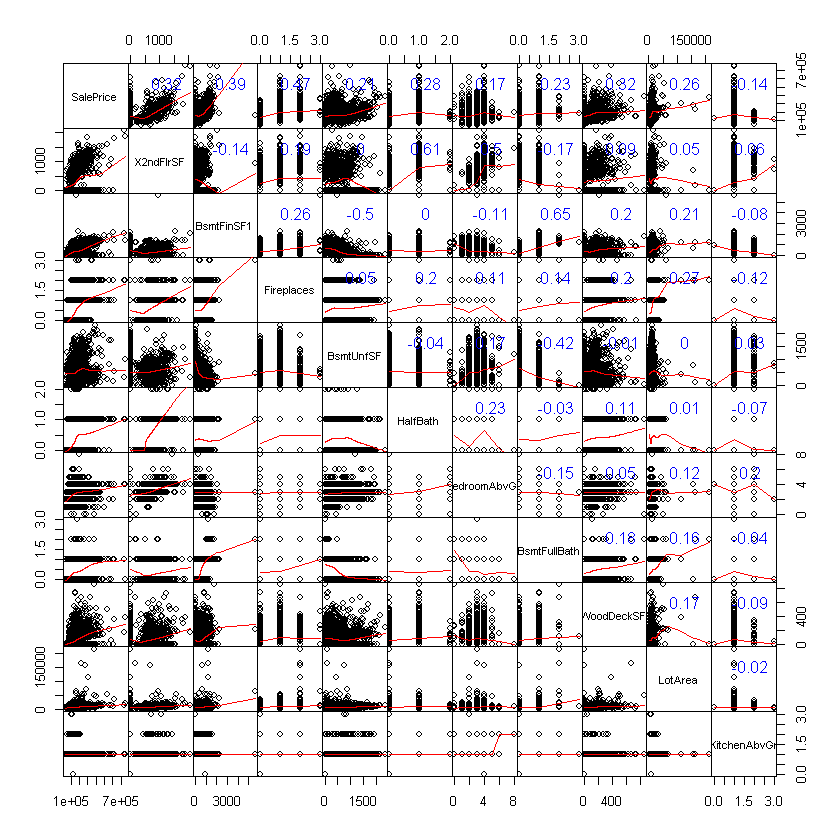

In [44]:
#Añadimos la columna de SalePrice para verificar su correlacion con las variables categoricas
pairs(Data_Cor[c(1,13,14,15,16,17,18,19,20,21,22)], gap=0, lower.panel = panel.smooth, upper.panel = function(x,y){
        panel.smooth(x,y)
        par(usr=c(0,1,0,1))
        correlacion <- cor(x,y, use="complete.obs")
        text(.6,.7, col="blue", cex=1.2, round(correlacion,digits=2))
}
)

### Eliminacion de variables por muy baja correlacion con SalePrice

**Segun la verificacion realizados en los histogramas y la correlacion entre las variables independientes con respecto a la variable dependiente(SalePrice), se procede a eliminar las variables numericas que cuentan con una correlacion inferior a 0.1 y superior a -0.1 dado que cuentan con una muy baja correlacion y no aportan a la prediccion del Modelo:**
- Id: Cuenta con una correlacion muy baja de -0.02191672 y no posee una distribucion normal
- MSSubClass:  Cuenta con una correlacion muy baja de -0.08428414
- OverallCond: Cuenta con una correlacion muy baja de  -0.07785589 
- BsmtFinSF2 : Cuenta con una correlacion muy baja de -0.01137812  y no posee una distribucion normal
- LowQualFinSF Cuenta con una correlacion muy baja de -0.02560613 y no posee una distribucion normal
- BsmtHalfBath Cuenta con una correlacion muy baja de -0.01684415 y no posee una distribucion normal
- X3SsnPorch: Cuenta con una correlacion muy baja de 0.046 y no posee una distribucion normal
- PoolArea:   Cuenta con una correlacion muy baja de 0.0924 y no posee una distribucion normal
- MiscVal:   Cuenta con una correlacion muy baja de -0.0212 y no posee una distribucion normal
- YrSold:    Cuenta con una correlacion muy baja de -0.0289 y no posee una distribucion normal

In [45]:
#Eliminamos las columnas que han sido seleccionados segun el previo analisis
borrar <- c("Id","MSSubClass","OverallCond","BsmtFinSF2","LowQualFinSF",
            "BsmtHalfBath","X3SsnPorch","PoolArea","MiscVal","YrSold")
DataNumeric<- DataNumeric[ , !(names(DataNumeric) %in% borrar)]

### Seleccion de variables por Dependencia

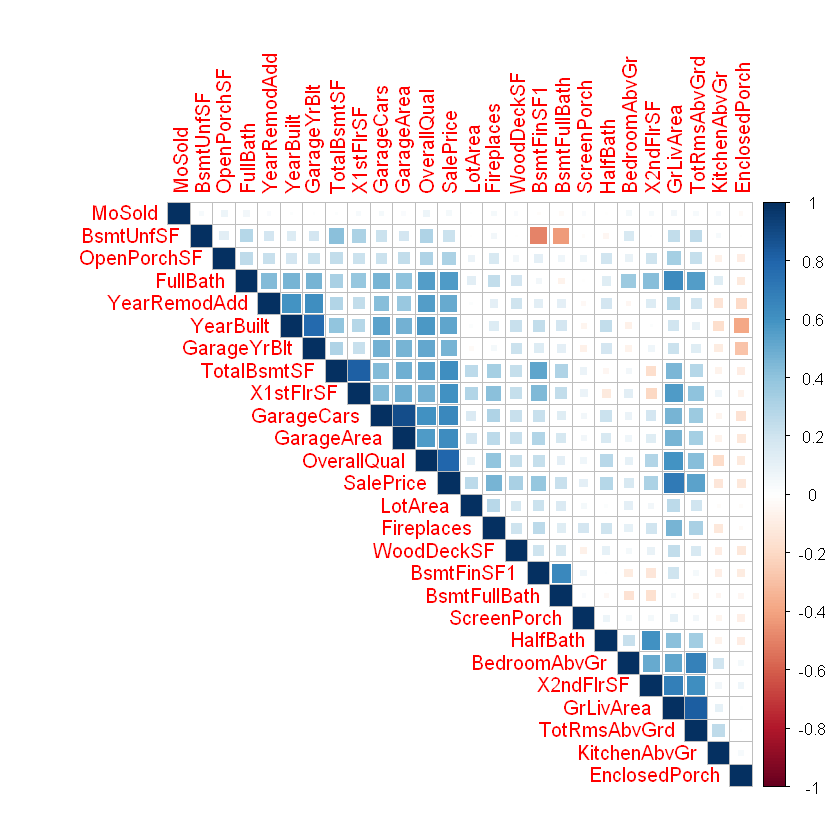

In [48]:
#Graficamos la Matriz de correlacion devariables numerica para tener una visualizacion panoramica de las mismas
#install.packages("corrplot")
DataNumeric<-Filter(is.numeric, DataNumeric)
library(corrplot)
corrplot(cor(DataNumeric), type="upper", order="hclust", method="square")

Para mas detalle de la matriz de correlacion obtenida por el mapa de calor(heatmap), hallamos las variables que posee mayor correlacion con respecto a SalePrice, el cual posiblemente exista alta dependencia dentro del conjunto de variables, por lo que debe ser evaluado.

In [49]:
#Hallamos la matriz de correlacion
correlationMatrix <- cor(DataNumeric[,])
#Filtramos las columnas que tenga una relacion superior a 0.1
highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=0.10)
a<-cor(DataNumeric$SalePrice, DataNumeric[highlyCorrelated], method = "pearson") 
print(a)

     SalePrice GrLivArea OverallQual GarageCars TotalBsmtSF X1stFlrSF
[1,]         1 0.7086245   0.7909816  0.6404092   0.6135806 0.6058522
     GarageArea  FullBath TotRmsAbvGrd YearBuilt GarageYrBlt YearRemodAdd
[1,]  0.6234314 0.5606638    0.5337232 0.5228973   0.4667537     0.507101
     Fireplaces X2ndFlrSF BsmtFinSF1 OpenPorchSF BsmtUnfSF  HalfBath
[1,]  0.4669288 0.3193338  0.3864198   0.3158562 0.2144791 0.2841077
     BedroomAbvGr WoodDeckSF BsmtFullBath
[1,]    0.1682132  0.3244134    0.2271222


Luego de haber analizado las correlaciones que existen entre SalePrice con respecto a las demas variables, se filtran que poseen una correlacion superior a 0.1 para las variables numericas

In [50]:
#Matriz de correlación
library(caret)
correlationMatrix <- cor(DataNumeric[,])
covMatrix = cov(DataNumeric[,])
cat(" Cor: GarageArea & X1stFlrSF: ",correlationMatrix[which(colnames(covMatrix)=="GarageArea"),which(colnames(covMatrix)=="X1stFlrSF")])
cat(" Cov: GarageArea & X1stFlrSF: ",covMatrix[which(colnames(covMatrix)=="GarageArea"),which(colnames(covMatrix)=="X1stFlrSF")])
print("/n")
cat(" Cor: GarageArea & X2ndFlrSF: ",correlationMatrix[which(colnames(covMatrix)=="GarageArea"),which(colnames(covMatrix)=="X2ndFlrSF")])
cat(" Cov: GarageArea & X2ndFlrSF: ",covMatrix[which(colnames(covMatrix)=="GarageArea"),which(colnames(covMatrix)=="X2ndFlrSF")])
print("/n")
cat(" Cor: TotalBsmtSF  & BsmtFinSF1 : ",correlationMatrix[which(colnames(covMatrix)=="TotalBsmtSF"),which(colnames(covMatrix)=="BsmtFinSF1")])
cat(" Cov: TotalBsmtSF & BsmtFinSF1: ",covMatrix[which(colnames(covMatrix)=="TotalBsmtSF"),which(colnames(covMatrix)=="BsmtFinSF1")])
print("/n")
cat(" Cor: OverallQual    & FullBath   : ",correlationMatrix[which(colnames(covMatrix)=="OverallQual"),which(colnames(covMatrix)=="FullBath")])
cat(" Cov: OverallQual   & FullBath  : ",covMatrix[which(colnames(covMatrix)=="OverallQual"),which(colnames(covMatrix)=="FullBath")])
print("/n")
cat(" Cor: OverallQual    & GrLivArea   : ",correlationMatrix[which(colnames(covMatrix)=="OverallQual"),which(colnames(covMatrix)=="GrLivArea")])
cat(" Cov: OverallQual   & GrLivArea  : ",covMatrix[which(colnames(covMatrix)=="OverallQual"),which(colnames(covMatrix)=="GrLivArea")])
print("/n")
cat(" Cor: BsmtUnfSF     & BsmtFinSF1   : ",correlationMatrix[which(colnames(covMatrix)=="BsmtUnfSF"),which(colnames(covMatrix)=="BsmtFinSF1")])
cat(" Cov: BsmtUnfSF    & BsmtFinSF1  : ",covMatrix[which(colnames(covMatrix)=="BsmtUnfSF"),which(colnames(covMatrix)=="BsmtFinSF1")])
print("/n")
cat(" Cor: TotalBsmtSF  & GarageArea : ",correlationMatrix[which(colnames(covMatrix)=="TotalBsmtSF"),which(colnames(covMatrix)=="GarageArea")])
cat(" Cov: TotalBsmtSF & GarageArea: ",covMatrix[which(colnames(covMatrix)=="TotalBsmtSF"),which(colnames(covMatrix)=="GarageArea")])
print("/n")
cat(" Cor: GrLivArea   & MasVnrArea   : ",correlationMatrix[which(colnames(covMatrix)=="GrLivArea"),which(colnames(covMatrix)=="MasVnrArea")])
cat(" Cov: GrLivArea  & MasVnrArea  : ",covMatrix[which(colnames(covMatrix)=="GrLivArea"),which(colnames(covMatrix)=="MasVnrArea")])
print("/n")
cat(" Cor: GrLivArea   & X1stFlrSF   : ",correlationMatrix[which(colnames(covMatrix)=="GrLivArea"),which(colnames(covMatrix)=="X1stFlrSF")])
cat(" Cov: GrLivArea  & X1stFlrSF  : ",covMatrix[which(colnames(covMatrix)=="GrLivArea"),which(colnames(covMatrix)=="X1stFlrSF")])
print("/n")


 Cor: GarageArea & X1stFlrSF:  0.4897817 Cov: GarageArea & X1stFlrSF:  40482.57[1] "/n"
 Cor: GarageArea & X2ndFlrSF:  0.138347 Cov: GarageArea & X2ndFlrSF:  12912.18[1] "/n"
 Cor: TotalBsmtSF  & BsmtFinSF1 :  0.5223961 Cov: TotalBsmtSF & BsmtFinSF1:  104527.6[1] "/n"
 Cor: OverallQual    & FullBath   :  0.5505997 Cov: OverallQual   & FullBath  :  0.41951[1] "/n"
 Cor: OverallQual    & GrLivArea   :  0.5930074 Cov: OverallQual   & GrLivArea  :  430.9608[1] "/n"
 Cor: BsmtUnfSF     & BsmtFinSF1   :  -0.4952515 Cov: BsmtUnfSF    & BsmtFinSF1  :  -99810.34[1] "/n"
 Cor: TotalBsmtSF  & GarageArea :  0.4866655 Cov: TotalBsmtSF & GarageArea:  45647.92[1] "/n"
 Cor: GrLivArea   & MasVnrArea   :   Cov: GrLivArea  & MasVnrArea  :  [1] "/n"
 Cor: GrLivArea   & X1stFlrSF   :  0.566024 Cov: GrLivArea  & X1stFlrSF  :  114984.5[1] "/n"


**De las correlaciones y covarianzas podemos extraer que las siguientes variables estan altamente correlacionados por lo que se eliminara uno de ellos:**
- GarageArea y X1stFlrSF: Se elimina X1stFlrSF dado que el area de garage posee mayor correlacion con SalePrice.
- GarageArea y X2ndFlrSF: Se elimina X2ndFlrSF dado que el area de garage posee mayor correlacion con SalePrice.
- TotalBsmtSF y BsmtFinSF1: Se elimina BsmtFinSF1 dado que la variable TotalBsmtSF posee mayor correlacion con SalePrice.
- BsmtUnfSF  y BsmtFinSF1: Se elimina BsmtUnfSF ya que no aporta mucha correlacion con SalePrice
- TotalBsmtSF  y GarageArea: Se elimina TotalBsmtSF ya que se correlaciona menos a SalePrice con respecto a GarageArea
- GrLivArea   & MasVnrArea: Se elimina MasVnrArea ya que  se correlaciona menos a SalePrice con respecto a GrLivArea

**Respecto a las siguiente variables, se mantendran ya que no cuentan con alta correlacion ni covarianza, asimismo sus datos mantienen una disperson no lineal**
- OverallQual y FullBath 

In [51]:
borrar <- c("X1stFlrSF","X2ndFlrSF","BsmtFinSF1","BsmtUnfSF","TotalBsmtSF","MasVnrArea")
DataNumeric <- DataNumeric[ , !(names(DataNumeric) %in% borrar)]

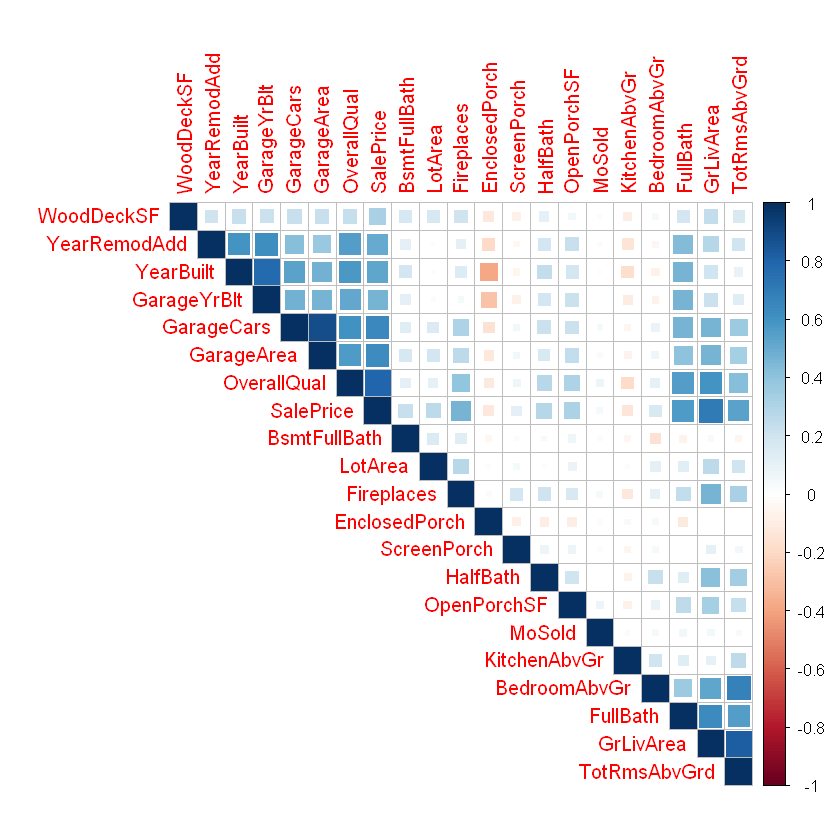

In [52]:
library(corrplot)
corrplot(cor(DataNumeric), type="upper", order="hclust", method="square")

In [53]:
cat("Porcentaje valores numericos faltantes:",sum(is.na(DataNumeric))/prod(dim(DataNumeric))*100,"%")

Porcentaje valores numericos faltantes: 0 %

## Tratamiento de variables categoricas

- **De las variables categóricas (limpias), listamos las diferentes categorías y hallamos la frecuencia de cada una de ellas.**

In [54]:
#Filtramos los datos categoricos para su evaluacion
str(DataCategorical)

'data.frame':	1460 obs. of  18 variables:
 $ Neighborhood : int  6 25 6 7 14 12 21 17 18 4 ...
 $ BldgType     : int  1 1 1 1 1 1 1 1 1 2 ...
 $ HouseStyle   : int  6 3 6 6 6 1 3 6 1 2 ...
 $ RoofStyle    : int  2 2 2 2 2 2 2 2 2 2 ...
 $ Exterior1st  : int  13 9 13 14 13 13 13 7 4 9 ...
 $ Exterior2nd  : int  14 9 14 16 14 14 14 7 16 9 ...
 $ ExterQual    : int  3 4 3 4 3 4 3 4 4 4 ...
 $ ExterCond    : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Foundation   : int  3 2 3 1 3 6 3 2 1 1 ...
 $ Heating      : int  2 2 2 2 2 2 2 2 2 2 ...
 $ HeatingQC    : int  1 1 1 3 1 1 1 1 3 1 ...
 $ CentralAir   : int  2 2 2 2 2 2 2 2 2 2 ...
 $ KitchenQual  : int  3 4 3 3 3 4 3 4 4 4 ...
 $ Functional   : int  7 7 7 7 7 7 7 7 3 7 ...
 $ GarageFinish : int  3 3 3 3 3 3 3 3 3 3 ...
 $ PavedDrive   : int  3 3 3 3 3 3 3 3 3 3 ...
 $ SaleType     : int  9 9 9 9 9 9 9 9 9 9 ...
 $ SaleCondition: int  5 5 5 1 5 5 5 5 1 5 ...


In [55]:
#Convertimos las variables categoricas a numericas
DataCategorical[sapply(DataCategorical, is.factor)] <- data.matrix(DataCategorical[sapply(DataCategorical, is.factor)])

## Nuevo Dataset a ser modelado (Filtrado)

In [56]:
housingdata_set <- cbind(DataNumeric,DataCategorical) #Unimos los datos numericos y categoricos para la obtencion del dataset que sera incluido en el modelamiento
str(housingdata_set)

'data.frame':	1460 obs. of  39 variables:
 $ LotArea      : int  8450 9600 11250 9550 14260 14115 10084 10382 6120 7420 ...
 $ OverallQual  : int  7 6 7 7 8 5 8 7 7 5 ...
 $ YearBuilt    : int  2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 ...
 $ YearRemodAdd : int  2003 1976 2002 1970 2000 1995 2005 1973 1950 1950 ...
 $ GrLivArea    : int  1710 1262 1786 1717 2198 1362 1694 2090 1774 1077 ...
 $ BsmtFullBath : int  1 0 1 1 1 1 1 1 0 1 ...
 $ FullBath     : int  2 2 2 1 2 1 2 2 2 1 ...
 $ HalfBath     : int  1 0 1 0 1 1 0 1 0 0 ...
 $ BedroomAbvGr : int  3 3 3 3 4 1 3 3 2 2 ...
 $ KitchenAbvGr : int  1 1 1 1 1 1 1 1 2 2 ...
 $ TotRmsAbvGrd : int  8 6 6 7 9 5 7 7 8 5 ...
 $ Fireplaces   : int  0 1 1 1 1 0 1 2 2 2 ...
 $ GarageYrBlt  : int  2003 1976 2001 1998 2000 1993 2004 1973 1931 1939 ...
 $ GarageCars   : int  2 2 2 3 3 2 2 2 2 1 ...
 $ GarageArea   : int  548 460 608 642 836 480 636 484 468 205 ...
 $ WoodDeckSF   : int  0 298 0 0 192 40 255 235 90 0 ...
 $ OpenPorchSF  : int

# CONJUNTO DE MODELIZACION Y VALIDACION

## REGRESION CON ARBOL DE DECISION

### Division de conjuntos de Training y Testing

In [59]:
TreeRegresion.Sample = sample.split(housingdata_set$SalePrice, SplitRatio = 0.75)

TreeRegresion.Train = subset(housingdata_set, TreeRegresion.Sample == TRUE)
TreeRegresion.Test = subset(housingdata_set, TreeRegresion.Sample == FALSE)

### Generacion del Modelo

In [60]:
#Creacion del arbol de decision - REGRESION
library(rpart)
TreeRegresion.Model<- rpart(formula =SalePrice ~ .,
                            data=TreeRegresion.Train)

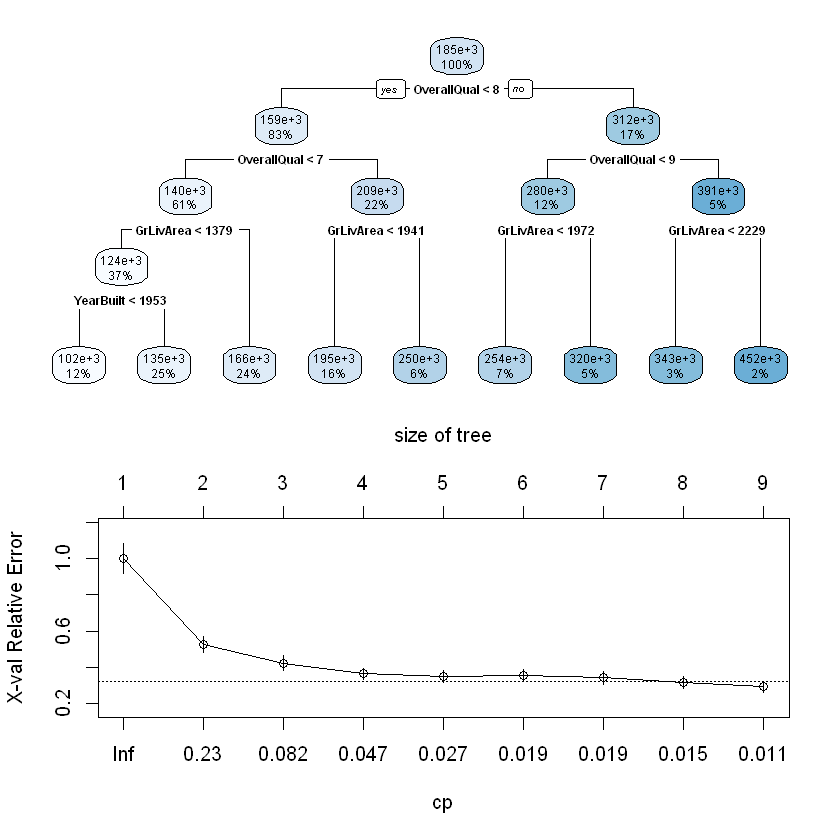

In [61]:
#Creacion del arbol de decision - REGRESION
TreeRegresion.Model<- rpart(SalePrice ~ .,data=TreeRegresion.Train)

#Grafico de la Prediccion - REGRESION
par(mfrow=c(2,1))
library(rpart.plot)
rpart.plot(TreeRegresion.Model)
plotcp(TreeRegresion.Model)

### Prediccion y Grafico de Relacion de Linealidad

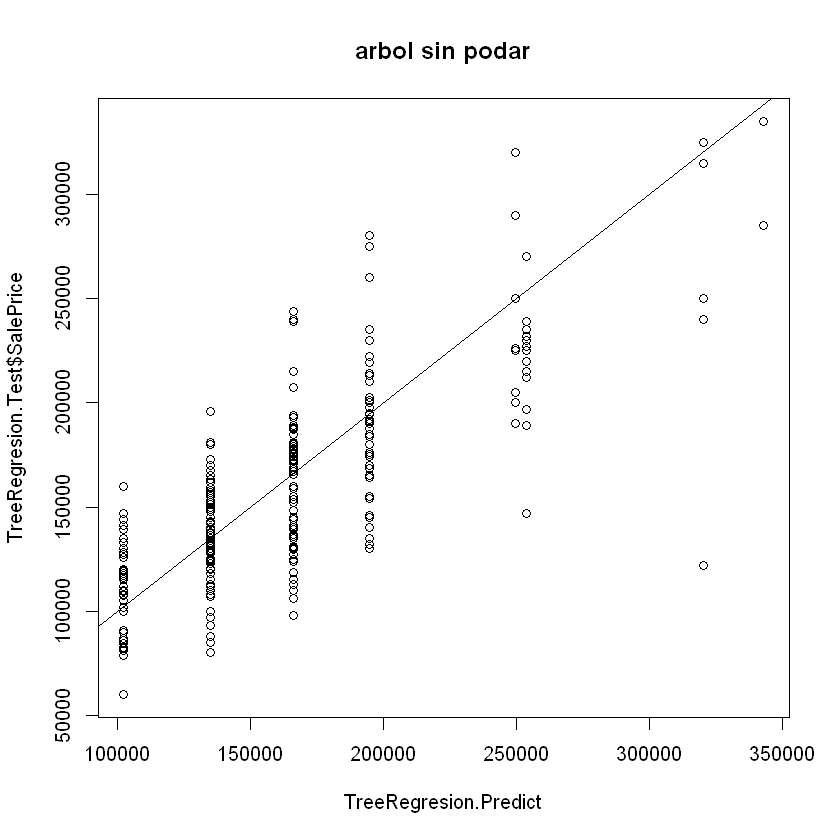

In [62]:
#Grafico de Relacion Prediccion vs Test
TreeRegresion.Predict <- predict(TreeRegresion.Model, newdata = TreeRegresion.Test)
plot(TreeRegresion.Predict, TreeRegresion.Test$SalePrice, main = "arbol sin podar")
abline(0, 1)

De la grafica se observa que existe una buena relacion lineal entre los datos test y los datos predichos, a pesaar que existe datos atipicos.

### Metrica de Evaluacion (MSE)

In [63]:
# Mean Square Error (MSE)
mean((TreeRegresion.Predict - TreeRegresion.Test$SalePrice)^2)

[1] 1153964218

## REGRESION CON RANDOM FOREST

In [66]:
#Instalacion de librerias
#install.packages("randomForest")
library(randomForest)
library(gmodels)

### Division de conjuntos de Training y Testing

In [68]:
#Particionamos el 70% de las muestras para el conjunto de entrenamiento
RandomForestRegression.Sample = sample.split(housingdata_set$SalePrice, SplitRatio = 0.70)

RandomForestRegression.train = subset(housingdata_set, RandomForestRegression.Sample == TRUE) #Muestras del conjunto de entrenamiento
RandomForestRegression.test = subset(housingdata_set, RandomForestRegression.Sample == FALSE) #Muestras del conjunto de pruebas

### Generacion del Modelo

In [69]:
#Generamos el modelo de Random Forest
RandomForestRegression.model <- randomForest(x = RandomForestRegression.train[,-1],
                                    y = RandomForestRegression.train$SalePrice,
                                    data = RandomForestRegression.train, 
                                    ntree = 300,
                                     do.trace= T)

     |      Out-of-bag   |
Tree |      MSE  %Var(y) |
   1 | 3.183e+08     4.43 |
   2 | 4.934e+08     6.87 |
   3 | 4.65e+08     6.47 |
   4 | 5.632e+08     7.84 |
   5 | 5.38e+08     7.49 |
   6 | 4.727e+08     6.58 |
   7 | 4.23e+08     5.89 |
   8 | 4.226e+08     5.88 |
   9 | 3.131e+08     4.36 |
  10 | 2.729e+08     3.80 |
  11 | 2.719e+08     3.79 |
  12 |  2.5e+08     3.48 |
  13 | 2.392e+08     3.33 |
  14 | 2.229e+08     3.10 |
  15 | 2.149e+08     2.99 |
  16 | 2.028e+08     2.82 |
  17 | 2.136e+08     2.97 |
  18 | 2.082e+08     2.90 |
  19 | 2.137e+08     2.98 |
  20 | 2.01e+08     2.80 |
  21 | 1.977e+08     2.75 |
  22 | 1.957e+08     2.73 |
  23 | 1.983e+08     2.76 |
  24 | 1.98e+08     2.76 |
  25 | 2.033e+08     2.83 |
  26 | 2.065e+08     2.88 |
  27 | 2.177e+08     3.03 |
  28 | 2.163e+08     3.01 |
  29 | 2.07e+08     2.88 |
  30 | 1.999e+08     2.78 |
  31 | 2.054e+08     2.86 |
  32 | 2.019e+08     2.81 |
  33 | 2.001e+08     2.79 |
  34 | 1.924e+08     2.68 |
 

### Prediccion y Grafico de Relacion de Linealidad

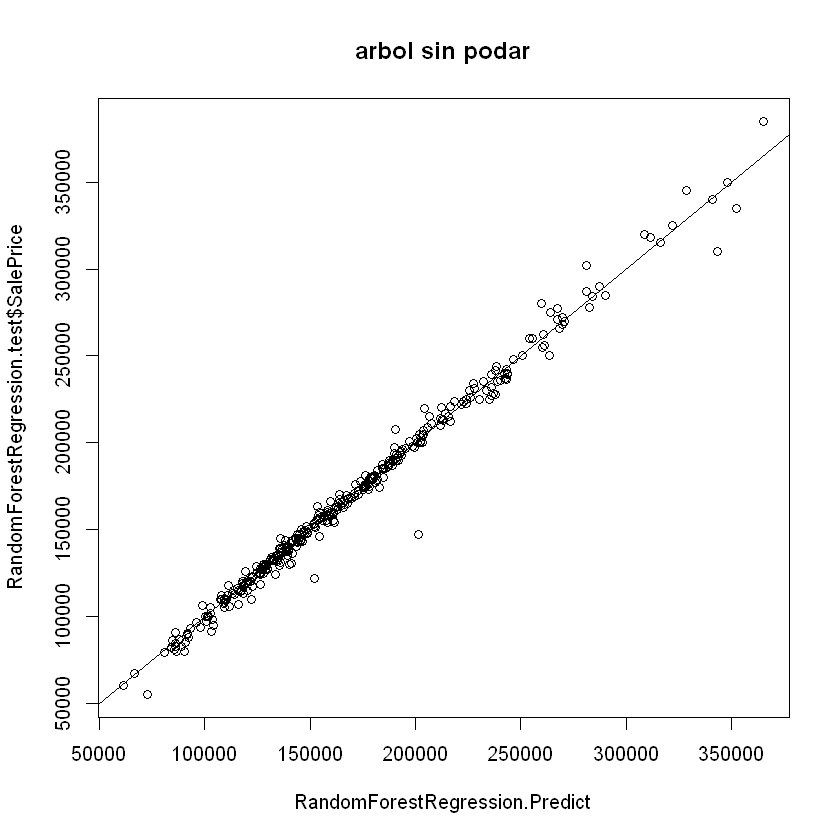

In [70]:
#Grafico de Relacion Prediccion vs Test
RandomForestRegression.Predict <- predict(RandomForestRegression.model,
                                          newdata = RandomForestRegression.test)
plot(RandomForestRegression.Predict, RandomForestRegression.test$SalePrice, main = "arbol sin podar")
abline(0, 1)

### Metrica de evaluacion (MSE)

In [71]:
#Mean Square Error (MSE)
mean((RandomForestRegression.Predict - RandomForestRegression.test$SalePrice)^2)

[1] 36178453

### Grafica del Modelo y Variables Importantes

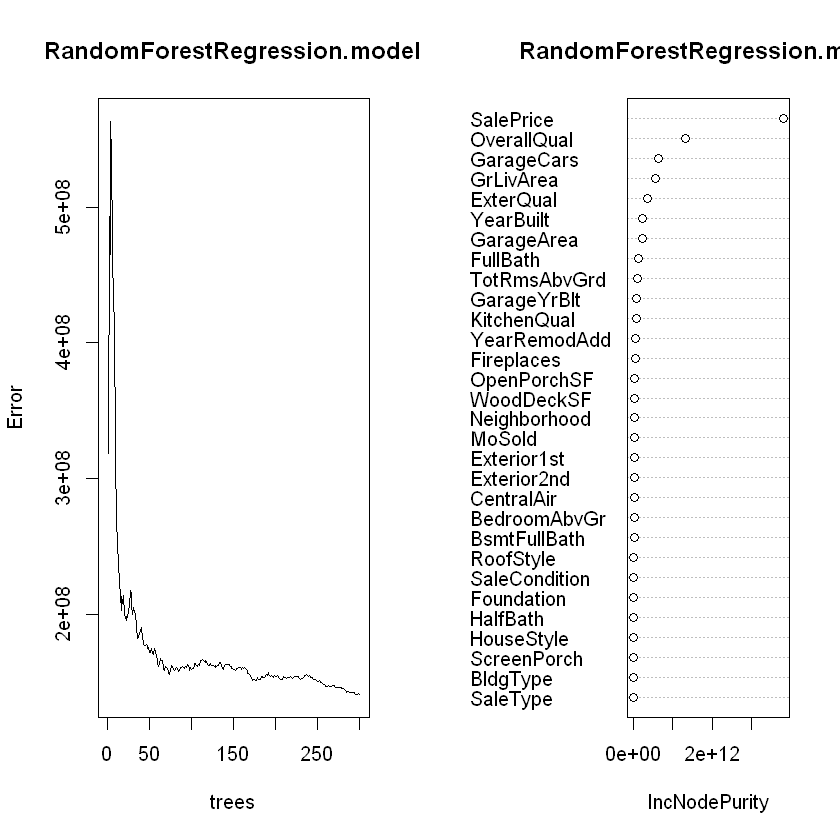

In [73]:
par(mfcol=c(1,2))
plot(RandomForestRegression.model)
varImpPlot(RandomForestRegression.model)

## CLASIFICACION CON ARBOL DE DECISION

### Agrupacion de variables como factores

In [74]:
housingdata_set_bin<-housingdata_set   #Copiamos temporalmente el dataset a otro dataframe para fines de discretizacion
b <- c(-Inf, 101000, 500000, Inf)      #Creamos un vector con los limites para la agrupacion de 3 grupos:
names <- c("<100K", "101K-500K", ">501K")# Establecemos el nobmre de los grupos que reemplazaran los rangos de valores
housingdata_set_bin$SalePrice <- cut(housingdata_set_bin$SalePrice, breaks = b, labels = names) #Cortamos el vector columna usando los breaks de b
housingdata_set_bin$SalePrice <- as.factor(housingdata_set_bin$SalePrice) #Convertimos a factor la columna de variables.
unique(housingdata_set_bin$SalePrice) #Visualizamos los grupos establecidos para la columna de SalePrice

[1] 101K-500K <100K     >501K    
Levels: <100K 101K-500K >501K

Los resultados nos indican que se agrupado exitosamente en 3 grupos seguiendo el rango de valores asignados para el precio del inmueble

### Division de datos de Training y Testing

In [76]:
#Division de datos de Training y Testing - CLASIFICACION
TreeClassification.Sample = sample.split(housingdata_set_bin$SalePrice, SplitRatio = 0.63) #Extraemos una muestra aleatoria del 65% del total de muestras
TreeClassification.Train = subset(housingdata_set_bin, TreeClassification.Sample == TRUE) #Repartimos el 65% para el dataset de entrenamiento
TreeClassification.Test = subset(housingdata_set_bin, TreeClassification.Sample == FALSE) #Repartimos el porcentaje restante al dataset de prueba

### Generacion y Grafica del Modelo

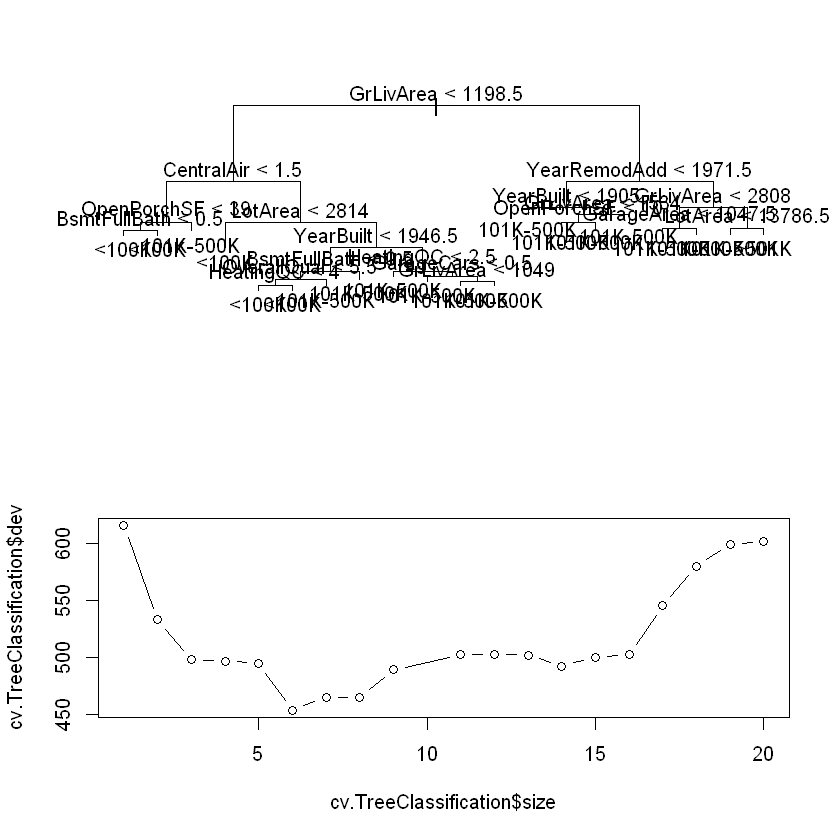

In [77]:
TreeClassification.Model <- tree(SalePrice ~ . , TreeClassification.Train) #Generamos el arbol definiendo a SalePrice como variable dependiente
par(mfrow=c(2,1))
plot(TreeClassification.Model)
text(TreeClassification.Model, pretty = 0)
#Cross validation
cv.TreeClassification<- cv.tree(TreeClassification.Model, K = 10) #Realizamos la validacion cruzada con 10 Folds
plot(cv.TreeClassification$size, cv.TreeClassification$dev, type = 'b') #Visualizamos con cuantos arboles es mas efectivo el arbol

### Calculo #1 de las métricas de evaluación

#### Prediccion y Matriz de Confusion

In [78]:
#Verificamos que posicion de columna es SalePrice
pos_SalePrice=which( colnames(TreeClassification.Test)=="SalePrice" )
# PredicciÃ³n de los resultados con el conjunto de testing
TreeClassification.Predict = predict(TreeClassification.Model,
                                     newdata = TreeClassification.Test[,-pos_SalePrice], 
                                     type = "class")

#Matriz de confusiÃ³n por numero de casos
table = table(TreeClassification.Test$SalePrice, TreeClassification.Predict,
           dnn = c("actual","Predecido"))
table

           Predecido
actual      <100K 101K-500K >501K
  <100K        28        18     0
  101K-500K    10       475     6
  >501K         0         2     1

- La matriz de confusion indica que para el modelo construido indica que la mejor prediccion se centra en el grupo de 101K-500K, y es evidente dado que es donde se concentra la mayor parte de las variables, y es lo contrario que pasa para el grupo de >501K, el cual tiene muy poco valores por lo que el modelo mantiene un error que confunde al grupo de 101K-500K, finalmente el grupo <100K mantiene un aprox de 50% de efectividad.

### Generacion del Podado del Arbol

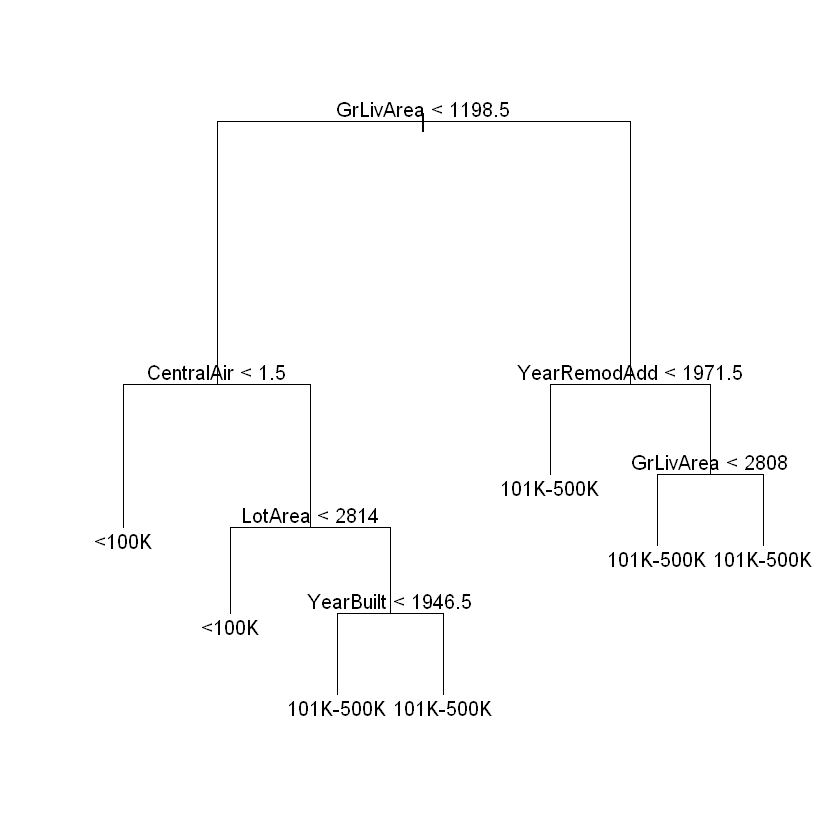

In [79]:
#Segun la grafica lineas arriba, nos indica que la cantidad mas efectiva de arboles para el modelo es con 7 arboles, por lo que seteamos dicho parametro para padar el arbol
TreeClassification.Model_Podado <- prune(TreeClassification.Model,best = 7) #Establecemos 7 arboles como el mejor arbol para podar
plot(TreeClassification.Model_Podado)                #Graficamos el arbol podado
text(TreeClassification.Model_Podado, pretty = 0)    #Establecemos el texto que describe las variables.

- La grafica nos muestra que efectivamente ha logrado clasificar los tres diferentes grupos tras el podado del arbol.

### Calculo #2 de las metricas de evaluacion

#### Prediccion y matriz de confusion

In [80]:
# PredicciÃ³n de los resultados con el conjunto de testing
pos_SalePrice=which( colnames(TreeClassification.Test)=="SalePrice" )
TreeClassification.Predict_Podado = predict(TreeClassification.Model_Podado,
                                     newdata = TreeClassification.Test[,-pos_SalePrice], 
                                     type = "class")

#Matriz de confusiÃ³n por numero de casos
table_podado = table(TreeClassification.Test$SalePrice, TreeClassification.Predict_Podado,
           dnn = c("actual","Predecido(Luego de ser Podado)"))
table_podado

           Predecido(Luego de ser Podado)
actual      <100K 101K-500K >501K
  <100K        20        26     0
  101K-500K     5       486     0
  >501K         0         3     0

- La matriz de confusion nos confirma que ha mejorado significativamente en el caso del grupo de <100K, la cual ha incrementado su prediccion con los datos de test. asimismo para el grupo de 101K-500K se ha visto afectado pero de una manera insignificante, y para el grupo de 501K se ha mantenido intacto con el % de aciertos.

###  Estadistica del modelo

In [81]:
#Calculamos el % de aciertos con el arbol Podado
total_td=sum(TreeClassification.Predict_Podado == TreeClassification.Test$SalePrice)/length(TreeClassification.Test$SalePrice)*100
cat("Total de aciertos con el arbol sin podar:",total_td,"%")
print("/n")
#Calculamos el % de aciertos con el arbol sin podar
total_td=sum(TreeClassification.Predict == TreeClassification.Test$SalePrice)/length(TreeClassification.Test$SalePrice)*100
cat("Total de aciertos:con el arbol podado",total_td,"%")

Total de aciertos con el arbol sin podar: 93.7037 %[1] "/n"
Total de aciertos:con el arbol podado 93.33333 %

- Los resultados indican que con el arbol podado hemos conseguido mejorar los aciertos, asimismo reducir el overfitting empleando la mejor cantidad de arboles necesarios segun la grafica previamente analizada por cruce de validacion con 10 K-Folds

## CLASIFICACION CON RANDOM FOREST

In [82]:
housingdata_set_bin2<-housingdata_set #Cargamos temporalmente a otro data frame para la discretizacion
b <- c(-Inf, 101000, 500000, Inf) #Establecemos los limites para los grupos
names <- c("<100K", "101K-500K", ">501K")# Establecemos los nombres para la factorizacion
housingdata_set_bin2$SalePrice <- cut(housingdata_set_bin2$SalePrice, breaks = b, labels =names) #Cortamos el vector en grupos
#Verificamos las clases factorizadas
unique(housingdata_set_bin2$SalePrice)
str(housingdata_set_bin2$SalePrice)

[1] 101K-500K <100K     >501K    
Levels: <100K 101K-500K >501K

 Factor w/ 3 levels "<100K","101K-500K",..: 2 2 2 2 2 2 2 2 2 2 ...


### Division de datos de Training y Testing

In [86]:
RandomForestClassification.Sample = sample.split(housingdata_set_bin2$SalePrice, SplitRatio = 0.70) # Muestras aleatorias para el conjunto de entrenamiento

RandomForestClassification.train = subset(housingdata_set_bin2, RandomForestClassification.Sample == TRUE) #Conjunto de entrenamiento
RandomForestClassification.test = subset(housingdata_set_bin2, RandomForestClassification.Sample == FALSE) #Conjunto de test

### Generacion del Modelo

In [87]:
columnas <-c("GrLivArea","OverallQual","GarageCars","TotalBsmtSF","X1stFlrSF","GarageArea","FullBath" )
#Entrenamos el Modelo de RandomForest para la clasificaciones de grupos
RandomForestClassification.model <- randomForest(
                                    x = RandomForestClassification.train,
                                    y = RandomForestClassification.train$SalePrice,
                                    data = RandomForestClassification.train, 
                                    ntree = 30,
                                    do.trace= T)

ntree      OOB      1      2      3
    1:   5.21% 25.64%  2.92%  0.00%
    2:   4.47% 26.23%  2.14%  0.00%
    3:   3.08% 16.44%  1.71%  0.00%
    4:   3.34% 14.81%  2.05% 16.67%
    5:   2.05% 13.25%  0.96%  0.00%
    6:   2.50% 12.79%  1.38% 16.67%
    7:   1.93%  8.05%  1.24% 16.67%
    8:   1.59%  9.20%  0.77% 16.67%
    9:   1.58% 11.49%  0.54% 16.67%
   10:   2.36% 16.09%  0.98% 16.67%
   11:   1.67%  8.05%  0.97% 16.67%
   12:   1.86% 11.49%  0.86% 16.67%
   13:   1.37%  9.20%  0.43% 33.33%
   14:   1.37%  8.05%  0.65% 16.67%
   15:   0.88%  6.90%  0.22% 16.67%
   16:   0.49%  4.60%  0.11%  0.00%
   17:   0.78%  5.75%  0.22% 16.67%
   18:   0.59%  4.60%  0.22%  0.00%
   19:   0.39%  3.45%  0.11%  0.00%
   20:   0.49%  4.60%  0.11%  0.00%
   21:   0.29%  2.30%  0.11%  0.00%
   22:   0.49%  5.75%  0.00%  0.00%
   23:   0.59%  6.90%  0.00%  0.00%
   24:   0.49%  4.60%  0.00% 16.67%
   25:   0.39%  4.60%  0.00%  0.00%
   26:   0.29%  3.45%  0.00%  0.00%
   27:   0.10%  1.15%  0.00%

-Se observa que a medida que se van generando mas arboles el error OOB va reduciendo, sin embargo se ve claramente que dependiendo de la cantidad de valores que contienen cada grupo, la cantidad de arboles requeridos varia. Es decir para el Grupo 3(>500K) al algoritmo le cuesta mas arboles para mejorar su clasificacion dado que su rango de valores son pocos, mientras que en el grupo 2(entre 101K y 500K) que contienen gran cantidad de valores, el error se reduce con poca cantidad de arboles.

### Grafica del Modelo y variables importantes

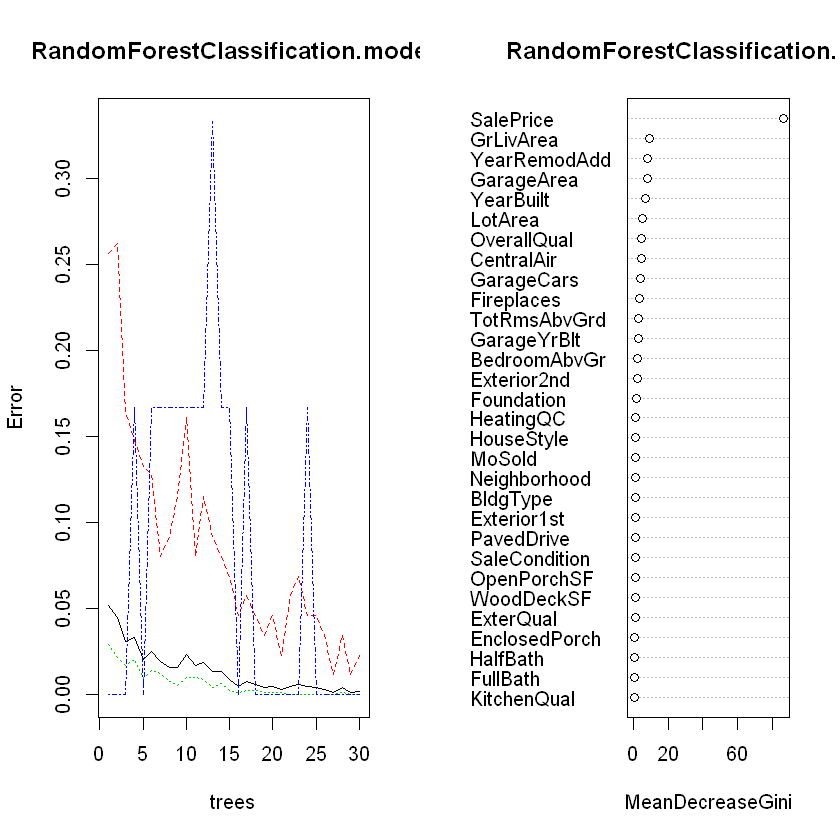

In [88]:
par(mfcol=c(1,2))
plot(RandomForestClassification.model)
varImpPlot(RandomForestClassification.model)

- En la primera grafica se aprecia el error segun la cantidad de arboles, para este algoritmo seleccionamos 30 arboles, ya que al algoritmo le permite generalizar mas la clase a predecir. sin embargo si bajamos la cantidad de arboles se observa que el error se expande mientras que si incrementamos el numero de arboles logramos un 100% de acierto generando un overfitting en el algoritmo.
- n la segunda grafica se puede vissualizar las variables mas importantes que se han incluido  para la creacion del Random Forest.

### Prediccion y matriz de confusion

In [89]:
RandomForestClassification.model


Call:
 randomForest(x = RandomForestClassification.train, y = RandomForestClassification.train$SalePrice,      ntree = 30, do.trace = T, data = RandomForestClassification.train) 
               Type of random forest: classification
                     Number of trees: 30
No. of variables tried at each split: 6

        OOB estimate of  error rate: 0.2%
Confusion matrix:
          <100K 101K-500K >501K class.error
<100K        85         2     0  0.02298851
101K-500K     0       929     0  0.00000000
>501K         0         0     6  0.00000000

- La matriz de confusion nos indica que el modelo ha clasificado exitosamente con un OOB tasa de error estimado de 0.50%, por lo que ademas si ajustamos el numero de arboles para reducir el error a 0%, este clasificador ya no lograria generalizar las clases , causando un problema mayor de sobre ajuste, en este punto se puede concluir que RandomForest a superado significativamente al Arbol de decision de clasificacion.

# COMPARACION DE RESULTADOS FINALES

## Comparacion de Error Cuadratico - Regresion

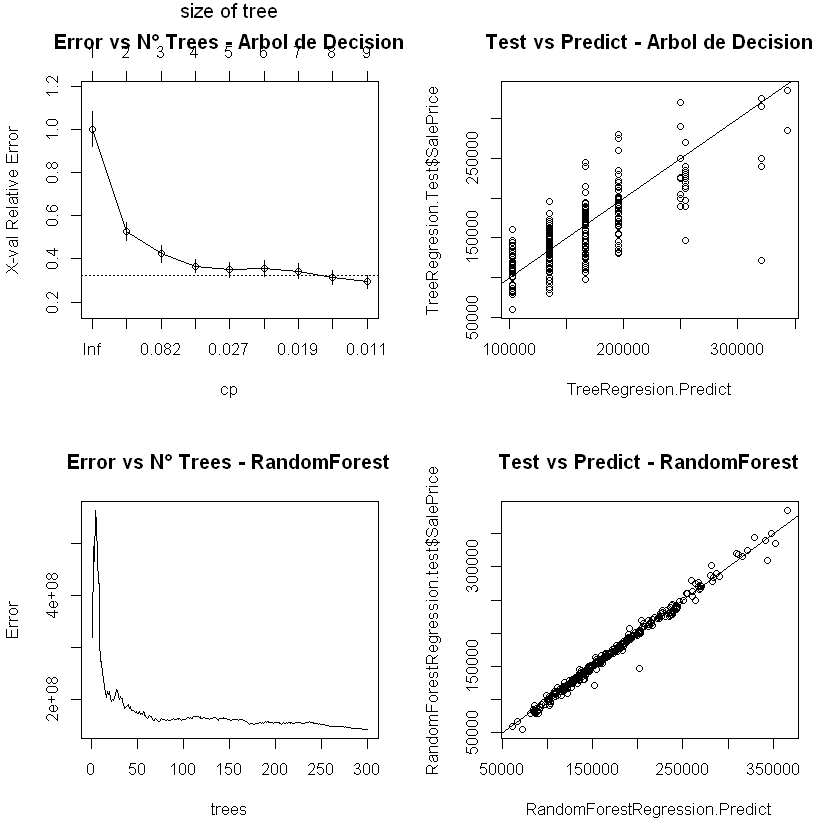

In [90]:
par(mfcol=c(2,2))

#Grafica del Error vs Numero de Arboles - Arbol de Decision
plotcp(TreeRegresion.Model, main= "Error vs N° Trees - Arbol de Decision")
#Grafica del Error vs Numero de Arboles - RandomForest
plot(RandomForestRegression.model, main= "Error vs N° Trees - RandomForest")

#Grafico de Relacion Prediccion vs Test - Arbol de Decision
plot(TreeRegresion.Predict, TreeRegresion.Test$SalePrice, main = "Test vs Predict - Arbol de Decision")
abline(0, 1)
#Grafico de Relacion Prediccion vs Test - RandomForest
RandomForestRegression.Predict <- predict(RandomForestRegression.model,
                                          newdata = RandomForestRegression.test)
plot(RandomForestRegression.Predict, RandomForestRegression.test$SalePrice, main = "Test vs Predict - RandomForest")
abline(0, 1)

Las graficas muestra que RandomForest ha conseguido una mejor prediccion que el arbol de decision.

In [91]:
#Modelo Regresion - ARBOL DE DECISION
# Mean Square Error (MSE)
mean((TreeRegresion.Predict - TreeRegresion.Test$SalePrice)^2)

[1] 1153964218

In [92]:
#Modelo Regresion - RANDOM FOREST
#Mean Square Error (MSE)
mean((RandomForestRegression.Predict - RandomForestRegression.test$SalePrice)^2)

[1] 36178453

**Conclusion:**
- Comparando el MSE con ambos algoritmos, se concluye que el mejor es el algoritmo RandomForest, dado que presenta un menor error cuadratico, apesar que no se ha obtenido un error minimo, se puede observar la gran diferencia significativa entre ambos modelos de regresion.

## Comparacion Matriz de confusion - Clasificacion

In [97]:
print("*****************************************")
print("******ARBOL DE DECISION - Matriz de Confusion:")
#Matriz de confusiÃ³n por numero de casos
table_podado = table(TreeClassification.Test$SalePrice, TreeClassification.Predict_Podado,
           dnn = c("actual","Predecido(Luego de ser Podado)"))
table_podado

print("*****************************************")
print("******RANDOM FOREST - Matriz de Confusion:")
#Matriz de confusiÃ³n por numero de casos
RandomForestClassification.model

[1] "*****************************************"
[1] "******ARBOL DE DECISION - Matriz de Confusion:"


           Predecido(Luego de ser Podado)
actual      <100K 101K-500K >501K
  <100K        20        26     0
  101K-500K     5       486     0
  >501K         0         3     0

[1] "*****************************************"
[1] "******RANDOM FOREST - Matriz de Confusion:"



Call:
 randomForest(x = RandomForestClassification.train, y = RandomForestClassification.train$SalePrice,      ntree = 30, do.trace = T, data = RandomForestClassification.train) 
               Type of random forest: classification
                     Number of trees: 30
No. of variables tried at each split: 6

        OOB estimate of  error rate: 0.2%
Confusion matrix:
          <100K 101K-500K >501K class.error
<100K        85         2     0  0.02298851
101K-500K     0       929     0  0.00000000
>501K         0         0     6  0.00000000

**Conclusion:**
- Comparando la matriz de confusion obtenida por ambos modelos, se concluye que el mejor es el algoritmo de RandomForest, dado que mantiene una mejor exactitud independientemente del overfitting que pueda presentar.

## Ventajas y Desventajas segun Resultados obtenidos

**Algoritmo de Arbol de decision**

Ventajas:
- Segun las pruebas realizadas, tiene un mejor perfomance en clasificacion respecto a regresion, por lo que se afirma que para una gra cantidad de datos, la eleccion de un modelo de clasificacion seria lo mas adecuado.
- Durante la compilacion de la construccion del arbol, se observa que no presenta un alto coste computacional, lo que logra reducir el tiempo en la generacion del modelo.
- Debido a su facil interpretacion de la construccion del arbol, es posible seguir intuitivamente las decisiones que se van tomando para llegar al objetivo final.


Desventajas:
- Estos algoritmos no tienen la misma exactitud en prediccion en comparacion con RandomForest, la cual se puede aprecia en el grafico de relacion test vs predict.
- Para obtener un buen resultado a comparacion de RandomForest, este algoritmo requiere una mayor preparacion de limpieza de datos ya que se ve afectado a los outliers que pudieron no estar bien procesados.
- Durante pruebas se observa que no posee buena exactitud en predecir valores continuos por lo que se concluye ques algo inadecuado crear modelo de regresion cuando se trabaja con gran cantidad de datos de entrada, no obstante podria trabajar mejor con menos cantidad de input para modelos de regresion.

**Algoritmo de RandomForest**

Ventajas:
- Segun la relacion de Test vs Predict, el algoritmo maneja mejor los outliers a comparacion del arbol de decision,el cual se ve afectado por la dispersion de estos valores atipicos, por lo que se concluye que es robusto frente a los outliers.
- Segun la matriz de confusion se puede visualizar que tiene una mejor prediccion frente a los arboles de decision, independientemente del overfitting que pueda tener.

Desventajas:
- Segun la compilacion realizada toma mas coste computacional ya que el algoritmo debe crear mas arboles, para este caso a partir de 50 arboles ya podia alcanzar la estabilidad del error minimo.
- No es posible interpretar las decisiones que va tomando los arboles, en la cual si es posible en los arboles de decision.
- Segun se observa en la matriz de confusion y grafico de relacion test vs predict, estos algoritmos tienden a generar overfitting para modelos de clasificacion o regresion con outliers.


## Otros comentarios

- Para los modelos de clasificacion en RandomForest y Arbol de decision, se observa que debido a que la cantidad del grupo (SalePrice>500000) es muy pequeña, se tiene un rango de mayor errores que con respecto a los otros grupos de clasificacion de SalePrice, cuyo rango de valores son mayores por ende los aciertos que hallaron.
- De las pruebas realizadas, se ve claramente que el modelo de regresion basado en arbol decision es mas vulnerable a los outliers en comparacion a RandomForest regresion.
- En la practica, independientemente de la limpieza de datos, para poder mejorar el modelo, se observa que el modelo debe pasar pruebas con diferente tamaños de muestras de entrenamiento, el cual segun las pruebas variando el grupo de entrenamiento en un rango de 50% a 80% se consigue estabilizar y mejorar el modelo predictivo